## Importing packages

In [97]:
#for manuplating dataset
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('seaborn-v0_8-pastel')

In [56]:
df = pd.read_csv(r"C:\Users\muthu\OneDrive\Desktop\DataAnalysis\2023_Spent.csv")
df.head(10)

,Tran Date,CHQNO,PARTICULARS,Company,DR,BAL,SOL
0,1/2/2023,-,UPI/P2M/300256060950/Airtel Pa/ICICI Ban/UPITran,Airtel,589,29856.91,3131
1,1/3/2023,-,POS/ZUDIO A UNIT OF T/TRICHY/030123/10:51,Zudio,1196,28660.91,3131
2,1/4/2023,-,UPI/P2M/337045298142/SUGUMAR M/Yes Bank /Payment,Bakery,50,28610.91,3131
3,1/5/2023,-,UPI/P2A/337112023980/Mr SASI K/Indian Ba/Payment,Appolo,3000,25510.91,3131
4,1/23/2023,-,POS/LIFE STYLE/CHENGALPATTU/230123/15:05,Trends,901,14546.05,3131
5,1/28/2023,-,UPI/P2M/302873527139/IRCTC Web/Paytm Pay/Payment,IRCTC,722,8824.25,3131
6,1/29/2023,-,UPI/P2M/302912127729/Jio Mobil/Yes Bank /JIO20BR,Jio,61,8763.25,3131
7,1/30/2023,-,UPI/P2M/303012403332/Airtel Pa/ICICI Ban/UPITran,Airtel,707,8056.43,3131
8,2/3/2023,-,POS/GAERANS ENTERPRIS/KANCHIPURAM/030223/18:21,Trends,1199,20078.43,3131
9,2/4/2023,-,UPI/P2A/303556157191/Saravanan/Bank of B/UPI,Saravana Bavan,100,19978.43,3131


## Data cleaning

In [57]:
df.dtypes

Tran Date       object
CHQNO           object
PARTICULARS     object
Company         object
DR               int64
BAL            float64
SOL              int64
dtype: object

In [58]:
#deleting unwanted columns
df.drop(columns=['CHQNO','PARTICULARS','SOL','BAL'],inplace=True)
df.head(10)

,Tran Date,Company,DR
0,1/2/2023,Airtel,589
1,1/3/2023,Zudio,1196
2,1/4/2023,Bakery,50
3,1/5/2023,Appolo,3000
4,1/23/2023,Trends,901
5,1/28/2023,IRCTC,722
6,1/29/2023,Jio,61
7,1/30/2023,Airtel,707
8,2/3/2023,Trends,1199
9,2/4/2023,Saravana Bavan,100


In [59]:
#renaming the columns
df.rename(columns={'Tran Date':'Date','DR':'Debit'},inplace=True)

#adding category column 
df['Category']='Na'

In [60]:
# available category
    # Rent
    # Grocery
    # Entertainment
    # Restaurant
    # Recharge
    # Ticket
    # Cosmetics
    # Shopping
    # Gift
    # investment
    #Salary

In [61]:
#Assign transactions to the correct category
df['Category'] = np.where(df['Company'].str.contains('Gpay|Phonepey|Axis'), 'Rent', df['Category'])
df['Category'] = np.where(df['Company'].str.contains('Bakery|Company|Reliance'), 'Grocery', df['Category'])
df['Category'] = np.where(df['Company'].str.contains('PVR|Sun Direct'), 'Entertainment', df['Category'])
df['Category'] = np.where(df['Company'].str.contains(
    'banaleaf|Copper Kitchen|Engineers Eatery|Ganapathy|Infosys|Kanchi daba|KFC|KMS|Muniandi vilas|Oven story|Ramanas|Red Box|Saravana Bavan|thahira|Roshan'), 'Restaurant', df['Category'])
df['Category'] = np.where(df['Company'].str.contains('Airtel|Jio|BSNL'), 'Recharge', df['Category'])
df['Category'] = np.where(df['Company'].str.contains('IRCTC|RedBus|SETC'), 'Ticket', df['Category'])
df['Category'] = np.where(df['Company'].str.contains('Appolo|Manmatter|KED'), 'Cosmetics', df['Category'])
df['Category'] = np.where(df['Company'].str.contains('Amazon|Lalitha Jwellery|Gas|Trends|Vendor|Zudio|Phone'), 'Shopping', df['Category'])
df['Category'] = np.where(df['Company'].str.contains('BabyHug'), 'Gift', df['Category'])
df['Category'] = np.where(df['Company'].str.contains('Grow|Udemy'), 'Investment', df['Category'])

In [62]:
#converting the date column to date-time and extracting month , year from date column
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

pd.options.display.max_rows= 900
df.head(10)

,Date,Company,Debit,Category,Month,Year
0,2023-01-02,Airtel,589,Recharge,1,2023
1,2023-01-03,Zudio,1196,Shopping,1,2023
2,2023-01-04,Bakery,50,Grocery,1,2023
3,2023-01-05,Appolo,3000,Cosmetics,1,2023
4,2023-01-23,Trends,901,Shopping,1,2023
5,2023-01-28,IRCTC,722,Ticket,1,2023
6,2023-01-29,Jio,61,Recharge,1,2023
7,2023-01-30,Airtel,707,Recharge,1,2023
8,2023-02-03,Trends,1199,Shopping,2,2023
9,2023-02-04,Saravana Bavan,100,Restaurant,2,2023


## EDA

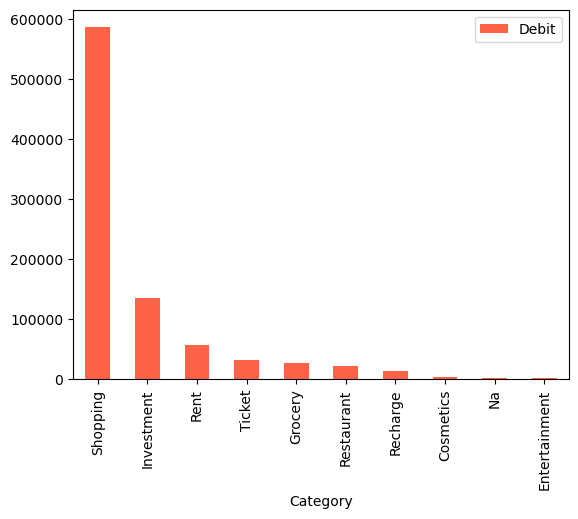

In [115]:
category_spent_tot = df.groupby('Category')['Debit'].sum().reset_index()
category_spent_tot = category_spent_tot.sort_values(by='Debit',ascending=False)
category_spent_tot.plot.bar(x='Category',y='Debit',rot=90,color='tomato')
plt.show()

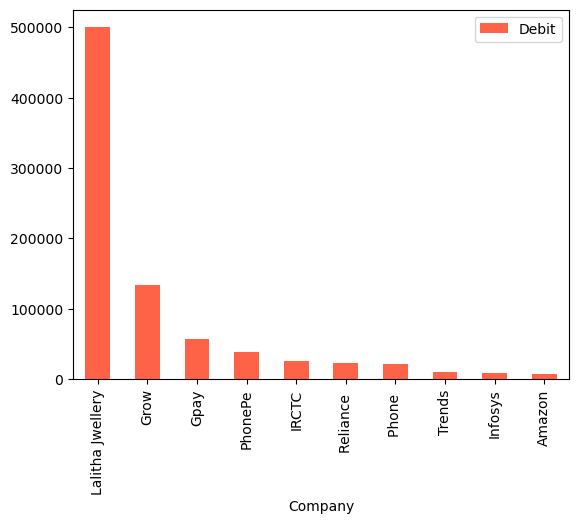

In [114]:
#top 10 company most spent
company_spent_tot = df.groupby('Company')['Debit'].sum().reset_index()
company_spent_tot = company_spent_tot.sort_values(by='Debit',ascending=False)
top_10 = company_spent_tot.head(10)
top_10.plot.bar(x='Company',y='Debit',rot=90,color='tomato')
plt.show()

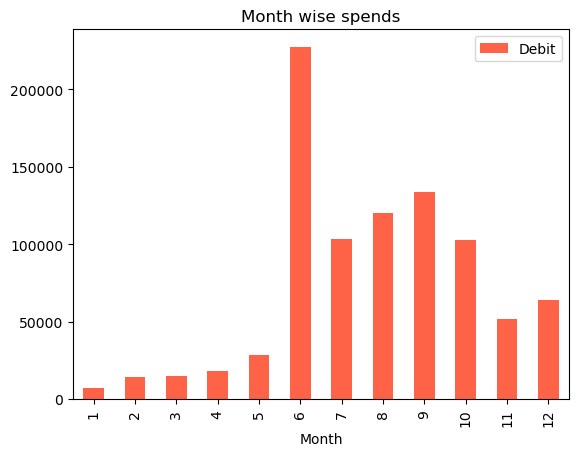

In [113]:
#month wise spends
monthly_spent = df.groupby('Month')['Debit'].sum().reset_index()
monthly_spent.plot.bar(x='Month',y='Debit',title="Month wise spends",color='tomato')
plt.show()

Total monthly spending experienced a notable increase in June, marked by significant ups and downs in the second half of the year.The cause for the peak in June remains unknown, prompting the need to investigate and identify the factors contributing to this spike. Additionally, there is a consistent pattern of higher spending over the last 6 months compared to the first, warranting further analysis to understand the reasons behind this sustained increase

In [66]:
#perecentage change in total spent for each month
monthly_spent['previous_month_cost'] = monthly_spent['Debit'].shift()
monthly_spent['percentage_change'] = ((monthly_spent['Debit'] - monthly_spent['previous_month_cost']) 
                                      / monthly_spent['previous_month_cost']) * 100
monthly_spent

,Month,Debit,previous_month_cost,percentage_change
0,1,7226,NaN,NaN
1,2,14131,7226.0,95.557708
2,3,14666,14131.0,3.786002
3,4,18063,14666.0,23.162416
4,5,28479,18063.0,57.664840
5,6,227230,28479.0,697.886162
6,7,103310,227230.0,-54.535053
7,8,120328,103310.0,16.472752
8,9,133438,120328.0,10.895220
9,10,102860,133438.0,-22.915511


In [67]:
june_month_expenses = df[(df['Month'] == 6)]

In [68]:
june_month_expenses = june_month_expenses.groupby('Category')['Debit'].sum().reset_index()
june_month_expenses = june_month_expenses.sort_values(by = 'Debit',ascending=False)
june_month_expenses

,Category,Debit
5,Shopping,191000
1,Investment,20000
3,Rent,7700
0,Grocery,5710
2,Recharge,1511
4,Restaurant,942
6,Ticket,367


In [71]:
#highest spent company in june in each Category
june_month = df[(df['Month'] == 6)]
hig_cmpny = june_month.groupby(['Category','Company'])['Debit'].sum().reset_index()
hig_cmpny.sort_values(by='Debit',ascending=False)

,Category,Company,Debit
7,Shopping,Lalitha Jwellery,170000
8,Shopping,Phone,21000
1,Investment,Grow,20000
4,Rent,Gpay,7700
0,Grocery,Reliance,5710
2,Recharge,BSNL,830
3,Recharge,Jio,681
5,Restaurant,Infosys,610
9,Ticket,IRCTC,367
6,Restaurant,Ramanas,332


The primary significant reason for the spike in June appears to be a substantial increase in spending on shopping , particularly with consistent monthly expenditures on Lalitha Jewelry from June onward and a purchace of a new mobile phone. This ongoing spending in the shopping category, specifically on Lalitha Jewelry, has contributed to the higher overall spending in the latter part of the year.

In [28]:
#Count of days for each restraunt
restraunt_df = df[(df['Category']=='Restaurant')]
restraunt_day = restraunt_df.groupby(['Category','Company'])['Date'].count().sort_values(ascending = False)
restraunt_day

Category    Company         
Restaurant  Infosys             141
            Ramanas               9
            Muniandi vilas        8
            Kanchi daba           5
            Red Box               5
            Engineers Eatery      4
            Ganapathy             4
            thahira               4
            KFC                   2
            Saravana Bavan        2
            Copper Kitchen        1
            KMS                   1
            Oven story            1
            Roshan                1
            banaleaf              1
Name: Date, dtype: int64

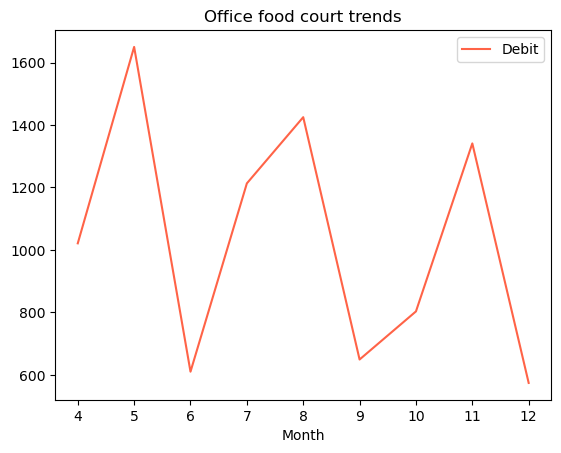

In [110]:
infy = df[(df['Company'] == 'Infosys')]
infy_trend = infy.groupby(['Month'])['Debit'].sum().reset_index()
infy_trend.plot.line(x='Month',y='Debit',title='Office food court trends',color='tomato')
plt.show()

The return to the office for three days a week was mandated at the beginning of April, leading to the initiation of office food court usage from April onwards. There was an increase observed from April to May, reflecting a transition to a full-week office working culture in May. The fluctuations in usage correspond to the months where i opted to bring home-cooked food to the office, resulting in both peaks and dips in food court utilization during those periods.

In [39]:
#average amount spent per day in restraunt
total_restraunt_days = restraunt_df['Date'].count()
total_spent = restraunt_df['Debit'].sum()
perDay_average_spent = total_spent / total_restraunt_days
perDay_average_spent

115.31216931216932

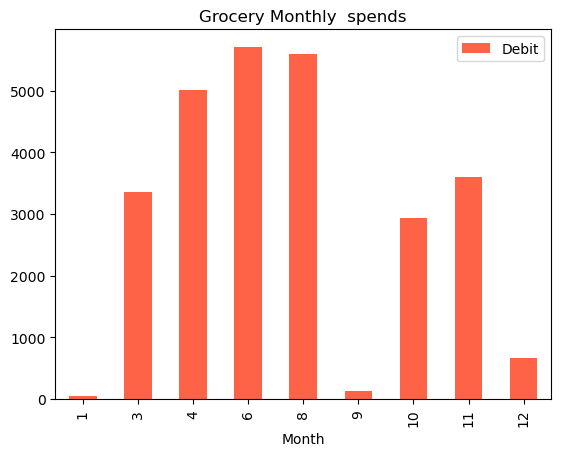

In [116]:
#month wise spends on grossery 
grocery_monthly_df = df[df['Category']=='Grocery']
grocery_monthly_spent = grocery_monthly_df.groupby('Month')['Debit'].sum().reset_index()
grocery_monthly_spent.plot.bar(x='Month',y='Debit',title="Grocery Monthly  spends",color='tomato')
plt.show()

Since March, I relocated to a new city due to the office return-to-office (RTO) policy, leading to an increase in grocery expenses. Lower grocery spending in a specific month indicates that I was back in my hometown during that period.

In [46]:
#Companies where i did shopping
shop_company = df[df['Category']=='Shopping']
shop_company = shop_company['Company'].unique()
shop_company

array(['Zudio', 'Trends', 'Amazon', 'Lalitha Jwellery', 'Vendor', 'Gas'],
      dtype=object)

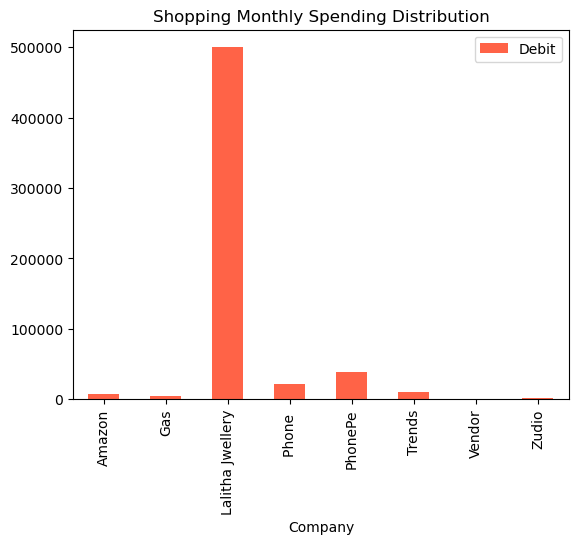

In [117]:
shopping_monthly_df = df[df['Category']=='Shopping']
shopping_monthly_spent = shopping_monthly_df.groupby('Company')['Debit'].sum().reset_index()
shopping_monthly_spent.plot.bar(x='Company', y='Debit', title='Shopping Monthly Spending Distribution',color='tomato')
plt.show()